<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/classification/example-multiclass-classification.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(multiclass-classification)=
# Example: Multiclass Classification Problem

This example is taken from Section 4.2 of the book "Deep Learning with Python" by François Chollet.

The Reuters dataset is a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. 

## Step 1: Load the data

In [1]:
from tensorflow.keras.datasets import reuters 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

`train_data` and `test_data`: lists of news stories, each story being a list of word indices (encoding a sequence of words).

`train_labels` and `test_labels`: The label associated with an example is an integer between 0 and 45—a topic index.

In [2]:
story_idx = 100
print(train_data[story_idx])
print(train_labels[story_idx])

[1, 367, 1394, 169, 65, 87, 209, 30, 306, 228, 10, 803, 305, 96, 5, 196, 15, 10, 523, 2, 3006, 293, 484, 2, 1440, 5825, 8, 145, 7, 10, 1670, 6, 10, 294, 517, 237, 2, 367, 8042, 7, 2477, 1177, 483, 1440, 5825, 8, 367, 1394, 4, 169, 387, 66, 209, 30, 2344, 652, 1496, 9, 209, 30, 2564, 228, 10, 803, 305, 96, 5, 196, 15, 51, 36, 1457, 24, 1345, 5, 4, 196, 150, 10, 523, 320, 64, 992, 6373, 13, 367, 190, 297, 64, 85, 1692, 6, 8656, 122, 9, 36, 1457, 24, 269, 4753, 27, 367, 212, 114, 45, 30, 3292, 7, 126, 2203, 13, 367, 6, 1818, 4, 169, 65, 96, 28, 432, 23, 189, 1254, 4, 9725, 320, 5, 196, 15, 10, 523, 25, 730, 190, 57, 64, 6, 9953, 2016, 6373, 7, 2, 122, 1440, 5825, 8, 269, 4753, 1217, 7, 608, 2203, 30, 3292, 1440, 5825, 8, 43, 339, 43, 231, 9, 667, 1820, 126, 212, 4197, 21, 1709, 249, 311, 13, 260, 489, 9, 65, 4753, 64, 1209, 4397, 249, 954, 36, 152, 1440, 5825, 506, 24, 135, 367, 311, 34, 420, 4, 8407, 200, 1519, 13, 137, 730, 190, 7, 104, 570, 52, 64, 2492, 7725, 4, 642, 5, 405, 7725, 249

The `reuters` object has a method `get_word_index` that returns a dictionary mapping words to an integer index.

In [3]:
news_idx = 0

word_index = reuters.get_word_index() 

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[news_idx]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
# the words indices range from 1 to 9999
print(min(min(seq) for seq in train_data))
print(max(max(seq) for seq in train_data))

print(reverse_word_index[1])
print(word_index["the"])


1
9999
the
1


## Step 2: Preprocess the data

In this step, we will convert the lists of integers into tensors that our neural network can process. 

We will implement **multi-hot-encoding** - a binary representation commonly used in NLP - to transform our lists into vectors of 0s and 1s. Each resulting tensor will be a 10,000-element vector where:

* 1 indicates the word appears in the review
* 0 indicates the word is absent

This representation creates a standardized format that our model can efficiently process while preserving the essential information about word presence in each review.



In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        for j in sequence:  
            results[i, j] = 1.
    return results 

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)



In [6]:

# check that the vectorized data is correct
for i in train_data[0]: 
    if x_train[0, i] != 1.0: 
        print(f"i={i} x_train[0, {i}]={x_train[0, i]}")

# test your understanding: why are these values not the same? 
print(sum(x_train[0]))
print(len(train_data[0]))


57.0
87


In [7]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels): 
        results[i, label] = 1.
        
    return results 
    
y_train = to_one_hot(train_labels) 
y_test = to_one_hot(test_labels)

In [9]:
print(y_train[100])

print(train_labels[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
20


In [10]:
# Note that there is a built-in way to do this in Keras:

from tensorflow.keras.utils import to_categorical 

y_train = to_categorical(train_labels) 
y_test = to_categorical(test_labels)

In [11]:
print(y_train[100])

print(train_labels[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
20


## Step 3: Build the model

### Softmax

Given a vector of raw predictions (logits) $z = (z_1, z_2, \dots, z_n)$, the softmax function $\sigma(z)$ is defined as:

$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

where:

* $\sigma(z)_i$ is the predicted probability for the $i^{\text{th}}$ class.
* The probabilities satisfy $\sum_{i=1}^{n} \sigma(z)_i = 1$.


In [12]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z)   
    return exp_z / np.sum(exp_z)

# Example usage:
logits = np.array([-20.0, -1.0, -1.1])
probabilities = softmax(logits)
print(probabilities)   
print(np.sum(probabilities))  # the sum of the probabilities should be 1

[2.94135151e-09 5.24979186e-01 4.75020811e-01]
1.0


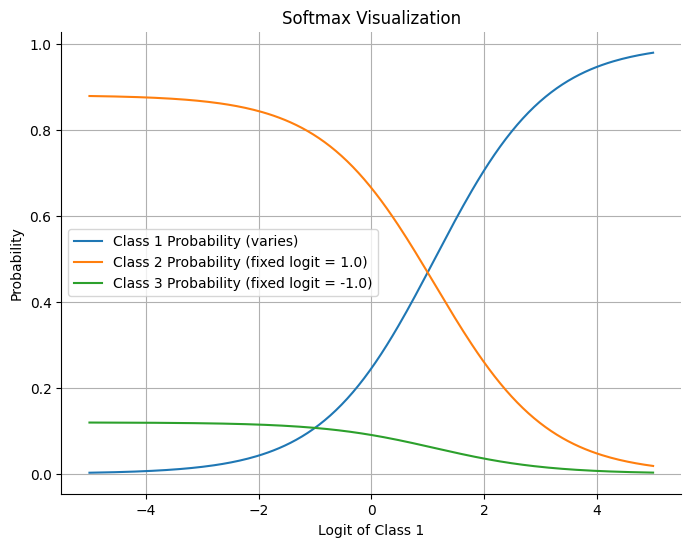

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Varying the logit of class 1, fix logits for class 2 and class 3 at distinct values
logits_class1 = np.linspace(-5, 5, 200)
fixed_logit_class2 = 1.0  
fixed_logit_class3 = -1.0 

probabilities = np.array([
    softmax([z, fixed_logit_class2, fixed_logit_class3]) 
    for z in logits_class1
])

plt.figure(figsize=(8, 6))
plt.plot(logits_class1, probabilities[:, 0], label='Class 1 Probability (varies)')
plt.plot(logits_class1, probabilities[:, 1], label=f'Class 2 Probability (fixed logit = {fixed_logit_class2})')
plt.plot(logits_class1, probabilities[:, 2], label=f'Class 3 Probability (fixed logit = {fixed_logit_class3})')

plt.xlabel("Logit of Class 1")
plt.ylabel("Probability")
plt.title("Softmax Visualization")
plt.grid(True)
sns.despine()
plt.legend()
plt.show()


### Categorical Crossentropy

Categorical cross-entropy is a loss function commonly used to train neural networks for multi-class classification problems, where each instance belongs to exactly one category.

Intuition: It measures how far away your model's predicted probabilities are from the true labels. A smaller loss means your model's predictions are close to the true labels, while a larger loss means predictions are far away.

Given:

* True labels: $y = (y_1, y_2, \dots, y_n)$, represented as a one-hot vector, where exactly one element is $1$ (the true class), and all others are $0$.
* Predicted probabilities: $\hat{y} = (\hat{y}_1, \hat{y}_2, \dots, \hat{y}_n)$, output by the softmax function.
 
The categorical cross-entropy loss is:

$$
\text{Loss} = -\sum_{i=1}^{n} y_i \log(\hat{y}_i)
$$

Since only the true class label $y_i = 1$ contributes, this simplifies to:

$$
\text{Loss} = -\log(\hat{y}_{\text{true class}})
$$


In [14]:
import numpy as np

def categorical_crossentropy(y_true, y_pred):
    # Ensure numerical stability by adding a tiny epsilon
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred))

# Example usage:
y_true = np.array([0, 0.5, 0.5])   
y_pred = np.array([0.0, 1.0, 0.0])  
loss = categorical_crossentropy(y_true, y_pred)
print(loss)   


17.269388197455342


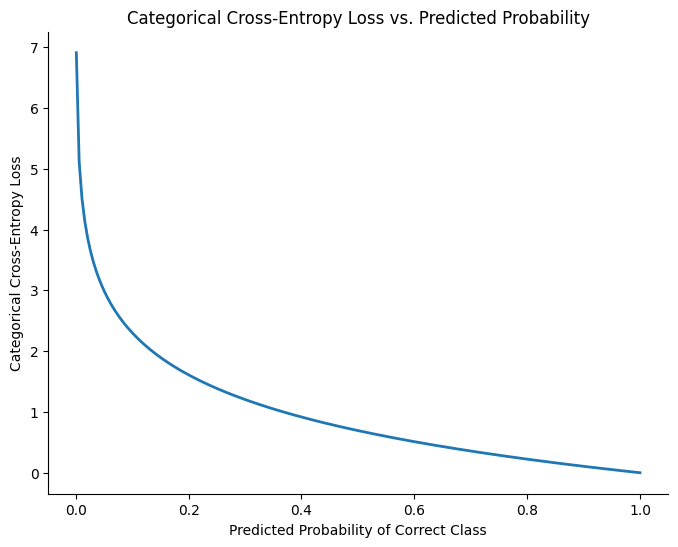

In [15]:

prob_correct = np.linspace(0.001, 1.0, 200)

loss_values = []
for p in prob_correct:
    y_true = np.array([1, 0, 0])            # True class is class 1
    y_pred = np.array([p, (1 - p)/2, (1 - p)/2])  # Remaining probability split evenly
    loss = categorical_crossentropy(y_true, y_pred)
    loss_values.append(loss)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(prob_correct, loss_values, label='Cross-Entropy Loss', linewidth=2)

plt.xlabel('Predicted Probability of Correct Class')
plt.ylabel('Categorical Cross-Entropy Loss')
plt.title('Categorical Cross-Entropy Loss vs. Predicted Probability')
plt.grid(False)
sns.despine()
plt.show()


### Defining the Model

In [16]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Step 4: Train the model


In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

We will train the model for 20 epochs in mini-batches of 512 samples.

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.0020 - loss: 3.8511

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3005 - loss: 3.5558  

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3802 - loss: 3.2720 - val_accuracy: 0.6150 - val_loss: 1.9034


Epoch 2/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6367 - loss: 1.9159

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6494 - loss: 1.7763 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6594 - loss: 1.7076 - val_accuracy: 0.6920 - val_loss: 1.4007


Epoch 3/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7480 - loss: 1.2192

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7348 - loss: 1.2270 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7342 - loss: 1.2215 - val_accuracy: 0.7300 - val_loss: 1.2038


Epoch 4/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7715 - loss: 1.0779

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7766 - loss: 1.0286 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7798 - loss: 1.0093 - val_accuracy: 0.7560 - val_loss: 1.0864


Epoch 5/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8164 - loss: 0.8555

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8307 - loss: 0.8020 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8291 - loss: 0.8024 - val_accuracy: 0.7850 - val_loss: 1.0041


Epoch 6/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8477 - loss: 0.7540

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8611 - loss: 0.6790 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8617 - loss: 0.6734 - val_accuracy: 0.8030 - val_loss: 0.9412


Epoch 7/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8848 - loss: 0.5550

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8864 - loss: 0.5438 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8851 - loss: 0.5474 - val_accuracy: 0.8090 - val_loss: 0.9043


Epoch 8/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9102 - loss: 0.5047

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9045 - loss: 0.4806 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9034 - loss: 0.4759 - val_accuracy: 0.8120 - val_loss: 0.8910


Epoch 9/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9355 - loss: 0.3514

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9274 - loss: 0.3636 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9241 - loss: 0.3741 - val_accuracy: 0.8230 - val_loss: 0.8596


Epoch 10/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9453 - loss: 0.3238

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9328 - loss: 0.3276 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9304 - loss: 0.3300 - val_accuracy: 0.8210 - val_loss: 0.8640


Epoch 11/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9414 - loss: 0.2757

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9436 - loss: 0.2832 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9409 - loss: 0.2880 - val_accuracy: 0.8230 - val_loss: 0.8470


Epoch 12/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9629 - loss: 0.2141

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9498 - loss: 0.2386 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9475 - loss: 0.2423

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9471 - loss: 0.2430 - val_accuracy: 0.8040 - val_loss: 0.8976


Epoch 13/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9492 - loss: 0.2190

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9497 - loss: 0.2238 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9485 - loss: 0.2252 - val_accuracy: 0.8260 - val_loss: 0.8883


Epoch 14/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9492 - loss: 0.2268

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9524 - loss: 0.2055 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9516 - loss: 0.2051 - val_accuracy: 0.8120 - val_loss: 0.9104


Epoch 15/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9590 - loss: 0.1678

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9572 - loss: 0.1826 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9552 - loss: 0.1839 - val_accuracy: 0.8110 - val_loss: 0.9088


Epoch 16/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9688 - loss: 0.1320

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9612 - loss: 0.1553 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9594 - loss: 0.1601 - val_accuracy: 0.8010 - val_loss: 0.9207


Epoch 17/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9727 - loss: 0.1208

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9625 - loss: 0.1418 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9597 - loss: 0.1498 - val_accuracy: 0.8150 - val_loss: 0.9234


Epoch 18/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9609 - loss: 0.1173

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9593 - loss: 0.1426 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9573 - loss: 0.1472 - val_accuracy: 0.8050 - val_loss: 0.9476


Epoch 19/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9609 - loss: 0.1328

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9636 - loss: 0.1289 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9614 - loss: 0.1332 - val_accuracy: 0.8040 - val_loss: 0.9226


Epoch 20/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9590 - loss: 0.1184

 7/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9633 - loss: 0.1116

15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9613 - loss: 0.1214 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9608 - loss: 0.1234 - val_accuracy: 0.8050 - val_loss: 0.9663


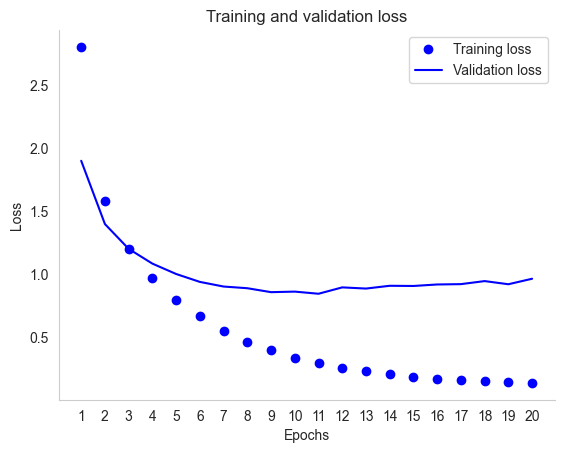

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

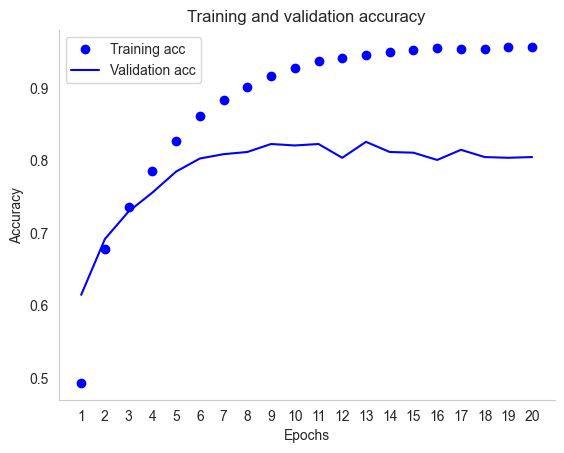

In [20]:
acc = history_dict["accuracy"]

val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

In [21]:
model = keras.Sequential([
    Dense(64, activation="relu"), 
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512) 
results = model.evaluate(x_test, y_test)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")


Epoch 1/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - accuracy: 0.0195 - loss: 3.8276

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3042 - loss: 3.5255  

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3940 - loss: 3.2322


Epoch 2/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6758 - loss: 1.8210

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6706 - loss: 1.6871 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6764 - loss: 1.6129


Epoch 3/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7480 - loss: 1.1294

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7418 - loss: 1.1697 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7464 - loss: 1.1505


Epoch 4/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7812 - loss: 0.9939

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7837 - loss: 0.9725 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7892 - loss: 0.9543


Epoch 5/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8594 - loss: 0.7261

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8404 - loss: 0.7634 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8369 - loss: 0.7693


Epoch 6/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8730 - loss: 0.6348

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8664 - loss: 0.6319 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8649 - loss: 0.6391


Epoch 7/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8809 - loss: 0.6337

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8934 - loss: 0.5534 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8929 - loss: 0.5452


Epoch 8/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9082 - loss: 0.4353

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9057 - loss: 0.4574 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9058 - loss: 0.4558


Epoch 9/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9395 - loss: 0.3297

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9321 - loss: 0.3521 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9265 - loss: 0.3675


 1/71 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8750 - loss: 0.6049

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.8057 - loss: 0.8844


The test loss is 0.8992824554443359
The test accuracy is 0.7978628873825073


### Prediction  

In [22]:
predictions = model.predict(x_test[0:5])

story_idx = 4
# Each entry in “predictions” is a vector of length 46:
print(predictions[story_idx].shape)

print(predictions[story_idx])
# The coefficients in this vector sum to 1, as they form a probability distribution:
print(np.sum(predictions[story_idx]))

# The largest entry is the predicted class—the class with the highest probability:
print(np.argmax(predictions[story_idx]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


(46,)
[3.07571972e-05 1.20142160e-03 4.92224295e-04 6.75465970e-04
 1.19806628e-03 2.59472174e-04 6.32150914e-04 2.03178315e-05
 6.97963696e-05 3.04486548e-05 1.70173636e-03 7.86590899e-05
 3.02055359e-05 9.66591954e-01 1.87984959e-04 2.46471755e-04
 1.50459120e-02 2.23638694e-04 1.94150143e-05 1.11113710e-03
 2.50303943e-04 2.33690025e-05 1.00681464e-04 1.43074154e-04
 7.23514240e-04 2.51381518e-03 3.59137921e-04 2.77811545e-04
 2.16019270e-03 2.59402532e-05 1.79915995e-04 8.27684184e-04
 3.74826050e-05 9.49231471e-05 1.40863121e-04 3.71684000e-05
 4.62813550e-05 3.82267172e-04 5.20552334e-04 4.38541552e-04
 6.36794866e-05 5.60002576e-04 9.92671266e-06 4.16651164e-05
 5.29689023e-05 1.40891862e-04]
0.9999999
13


Some things to try: 

* Check the accuracy of a purely random classifier
* Try using different optimizers: `adam` or `sgd`
* Try using larger or smaller layers: 32 units, 128 units, and so on.
* True using a single intermediate layer, or three intermediate layers.



In [23]:
model = keras.Sequential([
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512) 
results = model.evaluate(x_test, y_test)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")
print("The predictions are:")   
print(model.predict(x_test))

Epoch 1/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 5s 343ms/step - accuracy: 0.0508 - loss: 3.8226

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0484 - loss: 3.7252  


Epoch 2/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0410 - loss: 3.4909

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0447 - loss: 3.4240 


Epoch 3/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1777 - loss: 3.1862

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2120 - loss: 3.1196 


Epoch 4/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2051 - loss: 2.9037

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2133 - loss: 2.8480 


Epoch 5/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2402 - loss: 2.6430

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2191 - loss: 2.6067 


Epoch 6/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2090 - loss: 2.4244

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2144 - loss: 2.3921 


Epoch 7/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2188 - loss: 2.3182

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2907 - loss: 2.2548 


Epoch 8/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3691 - loss: 2.1466

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3537 - loss: 2.1406 


Epoch 9/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3594 - loss: 2.1612

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3550 - loss: 2.0848 


 1/71 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.4688 - loss: 1.9991

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.3664 - loss: 2.0622


The test loss is 2.0730934143066406
The test accuracy is 0.36197686195373535
The predictions are:


 1/71 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


[[3.46865022e-06 1.91365462e-02 2.38462671e-05 ... 1.35784885e-05
  2.76714263e-06 3.18770268e-04]
 [1.63364802e-02 2.79502980e-02 1.99538488e-02 ... 1.91452634e-02
  1.57624744e-02 2.07824446e-02]
 [8.36046413e-03 4.86135408e-02 1.26322135e-02 ... 9.10076592e-03
  6.57247705e-03 1.84406396e-02]
 ...
 [7.23141202e-05 3.92791443e-02 2.90563679e-04 ... 1.73247055e-04
  5.47270793e-05 1.81519799e-03]
 [1.29598020e-05 2.68912595e-02 6.99343946e-05 ... 3.97521508e-05
  9.81097401e-06 6.73184288e-04]
 [4.46469802e-03 5.59527390e-02 8.12193379e-03 ... 5.82352467e-03
  3.62541550e-03 1.53110567e-02]]
